**DQN FUNCTION**

In [27]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

def unflatten(flat_list, structure):
    flat_iter = iter(flat_list)
    def helper(struct):
        result = []
        for elem in struct:
            if isinstance(elem, list):
                result.append(helper(elem))
            else:
                result.append(next(flat_iter))
        return result
    return helper(structure)

def build_model(s_size, a_size):
    model = nn.Sequential(
        nn.Linear(s_size, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, a_size)
    )
    return model

def dqn_function(parameter_values, bounds, m_iterations, batch_size, memory_size, gamma, epsilon, epsilon_min, epsilon_decay, learning_rate):

    print("DQN Algorithm Started")

    para = flatten(parameter_values)
    len_para = len(para)

    max_iterations = m_iterations
    memory = deque(maxlen = memory_size)
    reward_array = []
    state_size = len_para
    action_size = 2 * len_para

    model = build_model(state_size, action_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    initial_values = [bounds[i][0] for i in range(len_para)]
    state = initial_values

    def remember(state, action, reward, next_state, done):
        memory.append((state, action, reward, next_state, done))

    def act(state):
        if np.random.rand() <= epsilon:
            return random.randrange(action_size)
        state = torch.FloatTensor(state).unsqueeze(0)
        act_values = model(state)
        return torch.argmax(act_values).item()

    def replay(batch_size):
        nonlocal epsilon
        if len(memory) < batch_size:
            return
        minibatch = random.sample(memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0)
                target = (reward + gamma * torch.max(model(next_state)).item())
            state = torch.FloatTensor(state).unsqueeze(0)
            target_f = model(state).detach().clone()
            target_f[0][action] = torch.tensor(target)
            model.zero_grad()
            loss = criterion(model(state), target_f)
            loss.backward()
            optimizer.step()
        if epsilon > epsilon_min:
            epsilon = epsilon * epsilon_decay

    for iter in range(max_iterations):

        action = act(state)

        if(action < len_para):
            para[action] = max(bounds[action][0], min(bounds[action][1], para[action] + np.random.uniform(-0.1, 0)))
        elif(action >= len_para):
            temp_action = action - len_para
            para[temp_action] = max(bounds[temp_action][0], min(bounds[temp_action][1], para[temp_action] + np.random.uniform(0, 0.1)))

        temp = unflatten(para, parameter_values)
        reward = objective_function(temp)

        next_state = para.copy()
        done = iter == max_iterations - 1

        remember(state, action, reward, next_state, done)
        state = next_state.copy()

        if len(memory) > batch_size:
            replay(batch_size)

        reward_array.append(reward)

        if iter % 100 == 0 or iter == (max_iterations-1):
            print(f"Iteration {iter}: Best value = {max(reward_array)}")
    return reward_array

**MAIN PROGRAM EXAMPLE**

In [14]:
import matplotlib.pyplot as plt

**RATE CALCULATION METHOD**

In [15]:
def objective_function(para):
    a, b, c = para
    return a*b-c

**INITIAL VALUES OF PARAMETERS TO BE OPTIMIZED LIST**

In [16]:
# Initial Values of Parameters
p_values = [1,2,1]

**BOUNDS**

For bounds, you have to create a list for the range of all variables of each optimizable parameter lists.

Suppose you have a 2D optimizable parameter list say **X = 3x2** size.

Then you have to mention **[lower limit, upper limit]*6**, (6 = the list length)

**3 More Cases:**

* In case there are no lower or upper range, you must use **[ -(float('inf')) , (float('inf')) ]**

* In case there is only no lower limit, you must use **-(float('inf'))** as lower limit

* In case there is only no upper limit, you must use **(float('inf'))** as upper limit

In [17]:
bounds = [(1,10),(2,50),(1,200)]

**DQN FUNCTION PARAMETERS (YOU CAN CHANGE)**

In [22]:
m_iterations = 200
number_of_simulations = 100 # Average of result of number of simulations (Any Integer Number)

batch_size=32
memory_size = 5000
gamma = 0.95  # discount rate
epsilon = 1.0  # exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.001

**RESULT**

In [23]:
average = []
for i in range(number_of_simulations):
    result = dqn_function(p_values, bounds, m_iterations, batch_size, memory_size, gamma, epsilon, epsilon_min, epsilon_decay, learning_rate)
    average.append(result)

DQN Algorithm Started
Iteration 0: Best value = 1.0626387927252896
Iteration 100: Best value = 2.1263772730485706
Iteration 199: Best value = 4.6027643958728826
DQN Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 2.265886669680408
Iteration 199: Best value = 4.378877229005697
DQN Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 1.8562045277402892
Iteration 199: Best value = 2.484237715388848
DQN Algorithm Started
Iteration 0: Best value = 1.1958098170292937
Iteration 100: Best value = 3.072899451219441
Iteration 199: Best value = 6.827443947466581
DQN Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 1.588402873596266
Iteration 199: Best value = 4.5856570892141715
DQN Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 1.6725491074820298
Iteration 199: Best value = 4.386813711188582
DQN Algorithm Started
Iteration 0: Best value = 1.0935719097255951
Iteration 100: Best value = 1.417474941741

**AVERAGE OF SIMULATIONS RESULT**

In [24]:
column_sums = [0] * len(average[0])

for row in average:
    for i in range(len(row)):
        column_sums[i] += row[i]

num_rows = len(average)
column_averages = [sum_value / num_rows for sum_value in column_sums]

**RESULT PLOTTING**

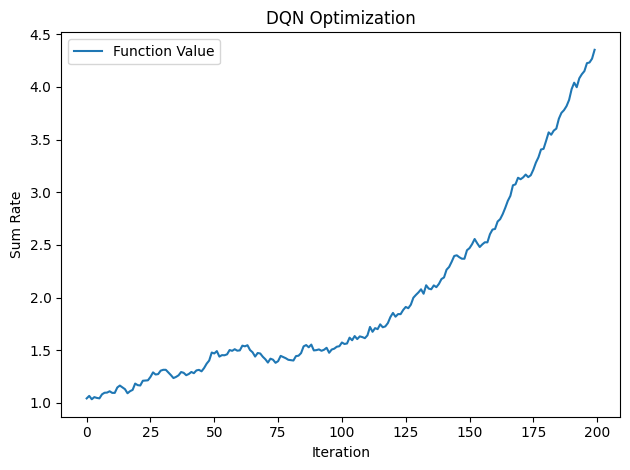

In [26]:
plt.plot(np.arange(len(column_averages)), column_averages, label='Function Value')
plt.title('DQN Optimization')
plt.xlabel('Iteration')
plt.ylabel('Sum Rate')
plt.legend()
plt.tight_layout()
plt.show()